# Regularized logistic regression

week3のRegularized logistic regressionについて

In [1]:
import math
import numpy as np
from scipy import optimize
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Visualizing the data

In [2]:
df_train = pd.read_csv("ex2data2.txt", names=('test1', 'test2', 'result'))
df_train.head(5)

,test1,test2,result
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [3]:
# クラス毎にデータを分ける
df_pos = df_train.ix[df_train['result'] == 1]
df_neg = df_train.ix[df_train['result'] == 0]

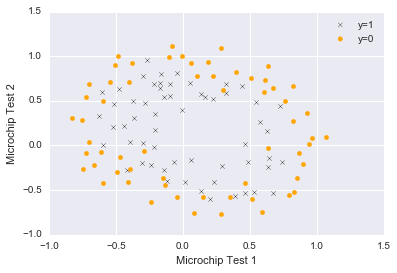

In [4]:
def plot_data():
    fig = plt.figure()
    plt.xlim(-1., 1.5)
    plt.ylim(-1., 1.5)

    ax = fig.add_subplot(1,1,1)
    ax.scatter(df_pos['test1'], df_pos['test2'],
               color='black', marker='x', label='y=1')
    ax.scatter(df_neg['test1'], df_neg['test2'],
               color='orange', marker='o', label='y=0')
    ax.legend()
    ax.set_xlabel('Microchip Test 1')
    ax.set_ylabel('Microchip Test 2')
    return ax

plot_data()
plt.savefig('week03_lrreg_train.png')

## Feature mapping

In [5]:
%run "regularized_logistic_regression.py"

In [6]:
X = map_feature(df_train['test1'], df_train['test2'])

In [7]:
df = pd.DataFrame(X); df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


## Cost function and gradient

In [8]:
y = np.array(df_train['result'])
y = y.reshape(len(y), 1)

initial_theta = np.zeros((X.shape[1],1))

In [9]:
lmd = 1
J = compute_cost_reg(initial_theta, X, y, lmd)
grad = compute_grad_reg(initial_theta, X, y, lmd)

J, grad

(0.6931471805599454, array([[  8.47457627e-03],
        [  1.87880932e-02],
        [  7.77711864e-05],
        [  5.03446395e-02],
        [  1.15013308e-02],
        [  3.76648474e-02],
        [  1.83559872e-02],
        [  7.32393391e-03],
        [  8.19244468e-03],
        [  2.34764889e-02],
        [  3.93486234e-02],
        [  2.23923907e-03],
        [  1.28600503e-02],
        [  3.09593720e-03],
        [  3.93028171e-02],
        [  1.99707467e-02],
        [  4.32983232e-03],
        [  3.38643902e-03],
        [  5.83822078e-03],
        [  4.47629067e-03],
        [  3.10079849e-02],
        [  3.10312442e-02],
        [  1.09740238e-03],
        [  6.31570797e-03],
        [  4.08503006e-04],
        [  7.26504316e-03],
        [  1.37646175e-03],
        [  3.87936363e-02]]))

## Plotting the decision boundary

In [10]:
gridsize = 100
x1s = np.linspace(-1, 1.5, gridsize)
x2s = np.linspace(-1, 1.5, gridsize)
x1s, x2s = np.meshgrid(x1s, x2s)

def compute_boundary(theta, x1s, x2s, gridsize):
    ys = np.zeros((gridsize, gridsize))
    for i in range(gridsize):
        for j in range(gridsize):
            x1 = np.array([x1s[i, j]])
            x2 = np.array([x2s[i, j]])
            ys[i, j] = np.dot(map_feature(x1, x2), theta)
    return ys

def plot_boundary(x1s, x2s, ys):
    ax = plot_data()
    plt.jet()
    ax.contour(x1s, x2s, ys, levels=[0])
    ax.legend()

### labmda = 1.0

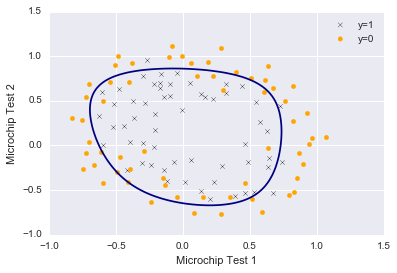

In [11]:
theta, J = optimize_theta(initial_theta, X, y, 1.0)

ys = compute_boundary(theta, x1s, x2s, gridsize)
plot_boundary(x1s, x2s, ys)
plt.savefig('week03_lrreg_lambda1.0.png')

In [12]:
ypreds = predict(theta, X)
compute_train_accuracy(ypreds, y)

81.355932203389841

### labmda = 0.0 (Overfitting)

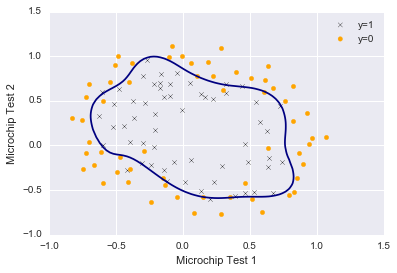

In [13]:
theta, J = optimize_theta(initial_theta, X, y, 0.0)

ys = compute_boundary(theta, x1s, x2s, gridsize)
plot_boundary(x1s, x2s, ys)
plt.savefig('week03_lrreg_lambda0.0.png')

In [14]:
ypreds = predict(theta, X)
compute_train_accuracy(ypreds, y)

88.135593220338976

### lambda = 10.0 (Underfitting)

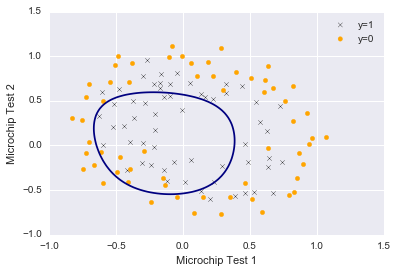

In [15]:
theta, J = optimize_theta(initial_theta, X, y, 10.0)

ys = compute_boundary(theta, x1s, x2s, gridsize)
plot_boundary(x1s, x2s, ys)
plt.savefig('week03_lrreg_lambda10.0.png')

In [16]:
ypreds = predict(theta, X)
compute_train_accuracy(ypreds, y)

66.101694915254242